<a href="https://colab.research.google.com/github/smkmohsin/Face-Emotion-Recognition/blob/main/Face_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

In [ ]:
img = cv2.imread('happyboy.jpg')

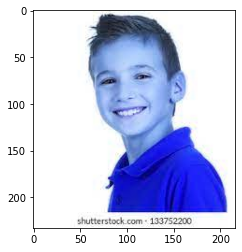

In [ ]:
plt.imshow(img) #BGR

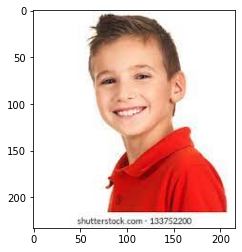

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
prediction = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.24it/s]


In [ ]:
prediction

{'emotion': {'angry': 1.2167652952907448e-10,
  'disgust': 3.501115480972379e-12,
  'fear': 2.4253210995084373e-06,
  'happy': 99.99988079071045,
  'sad': 9.627660890743073e-08,
  'surprise': 3.477477637445214e-11,
  'neutral': 0.00011880239298989181},
 'dominant_emotion': 'happy',
 'region': {'x': 49, 'y': 32, 'w': 104, 'h': 104},
 'age': 21,
 'gender': 'Man',
 'race': {'asian': 1.8333079293370247,
  'indian': 1.1038504540920258,
  'black': 0.17416415503248572,
  'white': 55.73941469192505,
  'middle eastern': 14.305251836776733,
  'latino hispanic': 26.84400975704193},
 'dominant_race': 'white'}

In [ ]:
prediction['dominant_emotion']

'happy'

# We try to draw rectangle around face

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

#function for webcam
def detect_web(image):
    faces = faceCascade.detectMultiScale(
        image=image, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(img=image, pt1=(x, y), pt2=(
            x + w, y + h), color=(0, 255, 0), thickness=2)

    return image

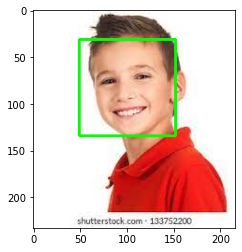

In [ ]:
plt.imshow(cv2.cvtColor(detect_web(img),cv2.COLOR_BGR2RGB))

In [ ]:
# Function for inserting text on video/image
def insert_text(image): 
    font = cv2.FONT_HERSHEY_SIMPLEX


    # Use putText() method
    cv2.putText(image,
               prediction['dominant_emotion'],
               (0, 50),
               font, 1,
               (0,0,255),
               2,
               cv2.LINE_4)
    return image

In [ ]:
plt.imshow(cv2.cvtColor(insert_text(img),cv2.COLOR_BGR2RGB))

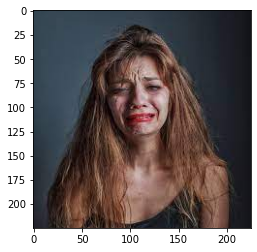

In [ ]:
img = cv2.imread('sadgirl.jpg')

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
prediction = DeepFace.analyze(img)

prediction

{'emotion': {'angry': 0.0005951552693696574,
  'disgust': 0.00010527167605604024,
  'fear': 43.37259491518706,
  'happy': 0.25794984913318453,
  'sad': 55.393562042329435,
  'surprise': 1.5737110331403766e-06,
  'neutral': 0.9751912787670659},
 'dominant_emotion': 'sad',
 'region': {'x': 70, 'y': 49, 'w': 78, 'h': 78},
 'age': 33,
 'gender': 'Woman',
 'race': {'asian': 0.34386408515274525,
  'indian': 0.22454734425991774,
  'black': 0.009249003051081672,
  'white': 78.71506810188293,
  'middle eastern': 10.640904307365417,
  'latino hispanic': 10.06636992096901},
 'dominant_race': 'white'}

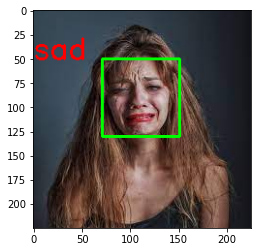

In [ ]:
plt.imshow(cv2.cvtColor(insert_text(detect_web(img)),cv2.COLOR_BGR2RGB))

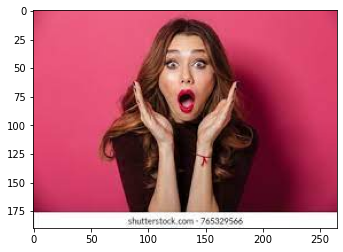

In [ ]:
img = cv2.imread('surprisegirl.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
prediction = DeepFace.analyze(img)

prediction

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.44it/s]


{'emotion': {'angry': 1.393955972872618e-06,
  'disgust': 1.118435273746583e-14,
  'fear': 0.43994556181132793,
  'happy': 2.9664917633454024e-05,
  'sad': 4.730452696222187e-08,
  'surprise': 99.56002235412598,
  'neutral': 5.5403618704538e-12},
 'dominant_emotion': 'surprise',
 'region': {'x': 102, 'y': 24, 'w': 63, 'h': 63},
 'age': 35,
 'gender': 'Woman',
 'race': {'asian': 22.911125297017414,
  'indian': 1.3447482009081961,
  'black': 0.502345508104295,
  'white': 53.45948657151977,
  'middle eastern': 10.23987071155731,
  'latino hispanic': 11.542428972865878},
 'dominant_race': 'white'}

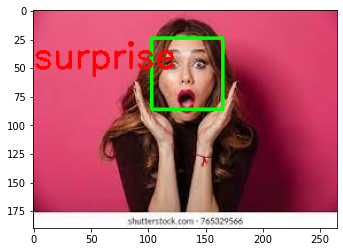

In [ ]:
plt.imshow(cv2.cvtColor(insert_text(detect_web(img)),cv2.COLOR_BGR2RGB))

# Realtime Emotion Detection

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

cap = cv2.VideoCapture(1)
#check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open webcam')
    
while True:
    ret, frame = cap.read()
    result = DeepFace.analyze(frame, actions= ['emotion'])
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1,4)
     
    #Draw a rectangle around the faces
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    
    # Use putText() method for
    # inseting text on video
    cv2.putText(frame,
               result['dominant_emotion'],
               (50, 50),
               font, 1,
               (0,0,255),
               2,
               cv2.LINE_4)
    
    cv2.imshow('Original Video', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()